In [1]:
# start with imports - this will be mostly EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ipython.display import display
#pd.options.display.max_columns = None

In [2]:
# import work stoppages annual listing
col_names = ["Year", "StopsBegin", "StopsEffect", "WorkerBegin", "WorkerEffect", "DaysIdle", "DaysIdlePct"]
stoppages = pd.read_csv("annual-listing.csv", header=0, names=col_names)

In [3]:
stoppages.head()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,[4],"1,629.0",[4],"25,720.0",[4]
1,1948,245,[4],"1,435.0",[4],"26,127.0",0.22
2,1949,262,[4],"2,537.0",[4],"43,420.0",0.38
3,1950,424,[4],"1,698.0",[4],"30,390.0",0.26
4,1951,415,[4],"1,462.0",[4],"15,070.0",0.12


From the original file we have the following notes:

[2] Days idle includes all stoppages in effect during the reference period. For work stoppages that are still ongoing at the end of the calendar year, only those days of idleness in the calendar year are counted. 

[3] Percent of estimated working time is calculated using employment estimates from the Current Employment Statistics program and the number of workdays in the month and number of days idle from the Work Stoppages program.

[4] Data not available.

[5] Less than .005.


On the basis of this, obviously, "[4]"s should be replaced with NaN's.  But what about "[5]"?  One very naive option is to simply pick the midpoint of 0.005 and 0, and I think I'll go with that here.

In [4]:
# maybe it will be this easy

stoppages.replace(to_replace="[4]", value=np.nan, inplace=True)
stoppages.replace(to_replace="[5]", value=0.0025, inplace=True)

In [5]:
display(stoppages)

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,"1,629.0",NaN,"25,720.0",NaN
1,1948,245,NaN,"1,435.0",NaN,"26,127.0",0.22
2,1949,262,NaN,"2,537.0",NaN,"43,420.0",0.38
3,1950,424,NaN,"1,698.0",NaN,"30,390.0",0.26
4,1951,415,NaN,"1,462.0",NaN,"15,070.0",0.12
...,...,...,...,...,...,...,...
71,2018,20,21,485.2,487.0,2815.4,0.01
72,2019,25,27,425.5,428.5,3244.3,0.01
73,2020,8,10,27.0,30.6,965.7,0.0025
74,2021,16,17,80.7,82.5,1551.9,0.0025


It looks like it was, in fact, that easy.  Before anything else - let's make some very basic graphs.

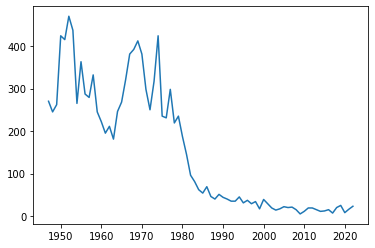

In [6]:
plt.plot(stoppages["Year"], stoppages["StopsBegin"])

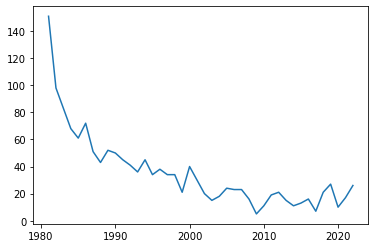

In [7]:
plt.plot(stoppages["Year"], stoppages["StopsEffect"])

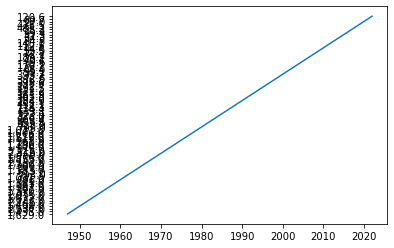

In [8]:
plt.plot(stoppages["Year"], stoppages["WorkerBegin"])

This makes absolutely no sense to me, and a cursory search wasn't informative.  The cases I found of this involved the variable being of string type; is that possibly happening here?

In [9]:
type(stoppages["WorkerBegin"][0])

str

Well, I guess that search WAS informative.

In [10]:
stoppages["WorkerBegin"] = pd.Series(map(float, stoppages["WorkerBegin"]))

ValueError: could not convert string to float: '1,629.0'

What a vexing little problem!  The comma precludes float representation.  Ugh.

In [11]:
stoppages["WorkerBegin"] = stoppages["WorkerBegin"].str.replace(",", "")

In [12]:
stoppages.head()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,1629.0,NaN,"25,720.0",NaN
1,1948,245,NaN,1435.0,NaN,"26,127.0",0.22
2,1949,262,NaN,2537.0,NaN,"43,420.0",0.38
3,1950,424,NaN,1698.0,NaN,"30,390.0",0.26
4,1951,415,NaN,1462.0,NaN,"15,070.0",0.12


This appears to have worked.  I can see that I need to do the same with DaysIdle.

In [13]:
stoppages["DaysIdle"] = stoppages["DaysIdle"].str.replace(",", "")
stoppages.head()

,Year,StopsBegin,StopsEffect,WorkerBegin,WorkerEffect,DaysIdle,DaysIdlePct
0,1947,270,NaN,1629.0,NaN,25720.0,NaN
1,1948,245,NaN,1435.0,NaN,26127.0,0.22
2,1949,262,NaN,2537.0,NaN,43420.0,0.38
3,1950,424,NaN,1698.0,NaN,30390.0,0.26
4,1951,415,NaN,1462.0,NaN,15070.0,0.12


In [14]:
# Now, both of these variables should be mappable to floats, right?

stoppages["WorkerBegin"] = pd.Series(map(float, stoppages["WorkerBegin"]))
stoppages["DaysIdle"] = pd.Series(map(float, stoppages["DaysIdle"]))

In [15]:
type(stoppages["WorkerBegin"][0])

numpy.float64

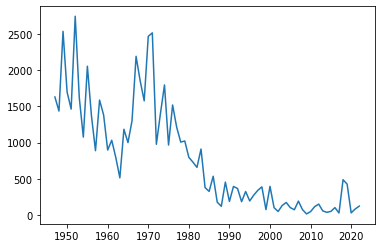

In [16]:
# this should now - after all that! - finally produce the simple line graph I wanted:

plt.plot(stoppages["Year"], stoppages["WorkerBegin"])

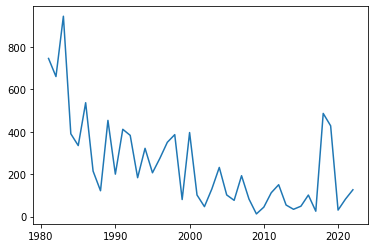

In [17]:
plt.plot(stoppages["Year"], stoppages["WorkerEffect"])

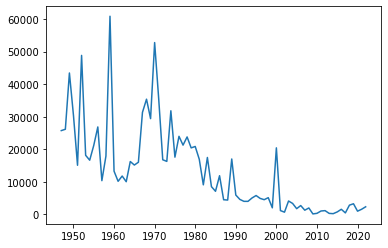

In [18]:
plt.plot(stoppages["Year"], stoppages["DaysIdle"])

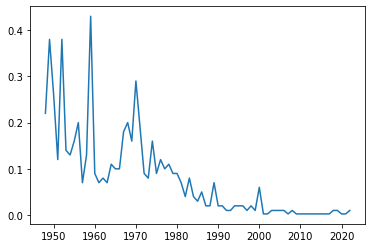

In [19]:
plt.plot(stoppages["Year"], stoppages["DaysIdlePct"])

Okay, so what's the story here?  In the first place, I have to note:  these series _don't_ have the same range.   It's obvious to see the (rough) correspondences between "StopsBegin" and "StopsEffect" and between "WorkerBegin" and "WorkerEffect" from the 1980's on.  Comparing "DaysIdle" and "DaysIdlePct" shows a similar correspondence, although if you look closely you'll discern the growing size of the labor force, as equal levels of "DaysIdle" correspond to slightly lower percentages.  

The most obvious phenomenon of all, however, is the overall downward trend in work stoppages.  By itself, this isn't much of a "data story" - I need to explore more deeply.  I'd like to incorporate some data sets involving union participation, workforce composition, and wage growth.  I'd also like to compare union activity across segments of the economy.  Unfortunately, I'm finding that the BLS data sources are simply _dismal_ - one important query is returning a _text file_ consisting of each series with the index _as a distinct csv, with a header_ - and I'm trying to work through that, although, as I understand, this isn't meant to be a data wrangling activity.

To my delight, I discovered that pandas read_csv has a "thousands" attribute!  This makes the import task far more tractable, although I am still going to need to clean up the atrocious non-csv file that the data tool returns.

In [20]:
union = pd.read_csv("union_repr.csv")

In [21]:
union.head()


,Series ID,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,Annual 1988,Annual 1989,Annual 1990,Annual 1991,...,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018,Annual 2019,Annual 2020,Annual 2021,Annual 2022
0,LUU0204466800,88290,92194,94521,96903,99303,101407,103480,104876,103723,...,129110.0,131431.0,133743.0,136101.0,137890.0,140099.0,141737.0,132174.0,136393.0,141673.0
1,LUU0203161800,17717,17340,16996,16975,16913,17002,16960,16776,16612,...,14528.0,14576.0,14795.0,14555.0,14817.0,14744.0,14574.0,14253.0,14012.0,14285.0
2,LUU0204899600,20.1,18.8,18.0,17.5,17.0,16.8,16.4,16.0,16.0,...,11.3,11.1,11.1,10.7,10.7,10.5,10.3,10.8,10.3,10.1
3,LUU0203161900,20532,19932,19358,19278,19051,19241,19198,19105,18790,...,16028.0,16152.0,16441.0,16271.0,16444.0,16380.0,16383.0,15939.0,15802.0,16002.0
4,LUU0204899700,23.3,21.6,20.5,19.9,19.2,19.0,18.6,18.2,18.1,...,12.4,12.3,12.3,12.0,11.9,11.7,11.6,12.1,11.6,11.3


There are so many things wrong here that I don't know where to begin!  Maybe making each year a row, and stripping the "Annual " from them.

In [24]:
union = union.transpose()

In [25]:
union.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Series ID,LUU0204466800,LUU0203161800,LUU0204899600,LUU0203161900,LUU0204899700,LUU0204466700,LUU0203182000,LUU0204906600,LUU0203182100,LUU0204906700,LUU0202851800,LUU0204922600,LUU0204922700,LUU0204922800,LUU0204922900
Annual 1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
Annual 1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
Annual 1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
Annual 1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,


In [26]:
union.index = union.index.str.replace('Annual ','')


In [27]:
union.index

Index(['Series ID', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [28]:
union.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Series ID,LUU0204466800,LUU0203161800,LUU0204899600,LUU0203161900,LUU0204899700,LUU0204466700,LUU0203182000,LUU0204906600,LUU0203182100,LUU0204906700,LUU0202851800,LUU0204922600,LUU0204922700,LUU0204922800,LUU0204922900
1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,


Ok, this is still pretty awful.  Variables are using some legacy "Series ID" that needs translation, and then to be placed into column labels, and then I can delete that first row.  Also, there are some footnotes present that need to be scrubbed, which means that data types probably need correction too.  Again:  this wasn't _supposed_ to be a data wrangling exercise...

In [29]:
new_columns = ["EmpWorkers", "EmpUnion", "UnionPct", "UnionRepr", "ReprPct", "EmpPrivate", "UnionPrivate", 
               "UnionPrivatePct", "PrivateRepr", "PrivateReprPct", "EmpPublic", "UnionPublic", "UnionPublicPct", 
              "PublicRepr", "PublicReprPct"]


In [30]:
union.columns = new_columns

In [31]:
union.head()

,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct
Series ID,LUU0204466800,LUU0203161800,LUU0204899600,LUU0203161900,LUU0204899700,LUU0204466700,LUU0203182000,LUU0204906600,LUU0203182100,LUU0204906700,LUU0202851800,LUU0204922600,LUU0204922700,LUU0204922800,LUU0204922900
1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,


In [32]:
union.drop(union.index[0], inplace=True)

In [33]:
union.head()

,EmpWorkers,EmpUnion,UnionPct,UnionRepr,ReprPct,EmpPrivate,UnionPrivate,UnionPrivatePct,PrivateRepr,PrivateReprPct,EmpPublic,UnionPublic,UnionPublicPct,PublicRepr,PublicReprPct
1983,88290,17717,20.1,20532,23.3,71225(5),11933(5),16.8(5),,,15618(5),5735(5),36.7(5),,
1984,92194,17340,18.8,19932,21.6,74931(5),11647(5),15.5(5),,,15809(5),5654(5),35.8(5),,
1985,94521,16996,18.0,19358,20.5,77044(5),11227(5),14.6(5),,,16050(5),5740(5),35.8(5),,
1986,96903,16975,17.5,19278,19.9,79091(5),11051(5),14.0(5),,,16374(5),5888(5),36.0(5),,
1987,99303,16913,17.0,19051,19.2,80993(5),10826(5),13.4(5),,,16841(5),6055(5),36.0(5),,


Now, there are several variables with footnotes; the only one I note is footnote (5).  From the raw output from the BLS data query:
    
    
5 : 1983-99 estimates exclude agricultural workers; as a result, 1983-99 private and government estimates will not sum to total.

This is unfortunate, and complicates any observations, but for now, let me just try to remove the footnotes and correct for data type.